<a href="https://colab.research.google.com/github/ayelar/challenge-alura-store/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [22]:
tienda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


In [2]:
tienda2.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Silla de oficina,Muebles,283600.0,15300.0,04/08/2021,Izabela de León,Medellín,1,Nequi,1,6.25184,-75.56359
1,Pandereta,Instrumentos musicales,76800.0,2300.0,26/11/2020,Blanca Ramirez,Medellín,3,Tarjeta de crédito,4,6.25184,-75.56359
2,Cama king,Muebles,443300.0,23800.0,22/10/2021,Izabela de León,Pereira,5,Tarjeta de crédito,10,4.81333,-75.69611
3,Cama king,Muebles,906200.0,46400.0,04/05/2022,Maria Alfonso,Cali,5,Tarjeta de crédito,10,3.43722,-76.52250
4,Silla de oficina,Muebles,397800.0,19400.0,26/02/2022,Lucas Olivera,Bogotá,4,Tarjeta de crédito,3,4.60971,-74.08175


#1. Análisis de facturación



In [3]:
facturacion1 = tienda['Precio'].sum()
print(facturacion1)

1150880400.0


In [4]:
facturacion2 = tienda2['Precio'].sum()
print(facturacion2)

1116343500.0


In [5]:
facturacion3 = tienda3['Precio'].sum()
print(facturacion3)

1098019600.0


In [6]:
facturacion4 = tienda4['Precio'].sum()
print(facturacion4)

1038375700.0


## **Graficar las facturaciones para compararlas**

In [7]:
import matplotlib.pyplot as plt

In [8]:
facturacion_tiendas = ({
    'Tienda': ['tienda', 'tienda2', 'tienda3', 'tienda4'],
    'Facturación': [facturacion1, facturacion2, facturacion3, facturacion4]
})

df_facturacion = pd.DataFrame(facturacion_tiendas)
df_facturacion

,Tienda,Facturación
0,tienda,1.150880e+09
1,tienda2,1.116344e+09
2,tienda3,1.098020e+09
3,tienda4,1.038376e+09


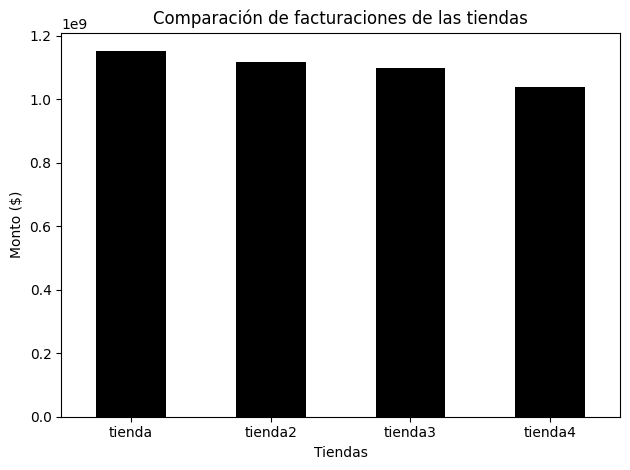

In [10]:
df_facturacion.plot(
    x='Tienda',
    y='Facturación',
    kind='bar',
    legend=False,
    color='black'
)

plt.title('Comparación de facturaciones de las tiendas')
plt.ylabel('Monto ($)')
plt.xlabel('Tiendas')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 2. Ventas por categoría

### **Tienda 1: cantidad de productos vendidos por categoría**

In [18]:
tienda

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359
...,...,...,...,...,...,...,...,...,...,...,...,...
2354,Iphone 15,Electrónicos,1284400.0,66600.0,15/11/2021,Izabela de León,Medellín,1,Nequi,1,6.25184,-75.56359
2355,Impresora,Electrónicos,282800.0,15300.0,18/03/2023,Lucas Olivera,Bogotá,5,Nequi,1,4.60971,-74.08175
2356,Juego de mesa,Juguetes,122900.0,7200.0,06/07/2021,Lucas Olivera,Cali,5,Tarjeta de crédito,4,3.43722,-76.52250
2357,Cama box,Muebles,691300.0,35000.0,02/05/2022,Pedro Gomez,Pasto,1,Tarjeta de crédito,2,1.21361,-77.28111


In [19]:
tienda.count()

,0
Producto,2359
Categoría del Producto,2359
Precio,2359
Costo de envío,2359
Fecha de Compra,2359
Vendedor,2359
Lugar de Compra,2359
Calificación,2359
Método de pago,2359
Cantidad de cuotas,2359


In [27]:
tienda_productos = tienda.groupby('Categoría del Producto')['Producto'].count().sort_values(ascending=False)
tienda_productos

,Producto
Categoría del Producto,
Muebles,465
Electrónicos,448
Juguetes,324
Electrodomésticos,312
Deportes y diversión,284
Instrumentos musicales,182
Libros,173
Artículos para el hogar,171


In [26]:
tienda_productos.sum()

np.int64(2359)

### **Tienda 2: Cantidad de productos vendidos por categoría.**

In [28]:
tienda2.count()

,0
Producto,2359
Categoría del Producto,2359
Precio,2359
Costo de envío,2359
Fecha de Compra,2359
Vendedor,2359
Lugar de Compra,2359
Calificación,2359
Método de pago,2359
Cantidad de cuotas,2359


In [29]:
tienda2_productos = tienda2.groupby('Categoría del Producto')['Producto'].count().sort_values(ascending=False)
tienda2_productos

,Producto
Categoría del Producto,
Muebles,442
Electrónicos,422
Juguetes,313
Electrodomésticos,305
Deportes y diversión,275
Instrumentos musicales,224
Libros,197
Artículos para el hogar,181


In [30]:
tienda2_productos.sum()

np.int64(2359)

### **Tienda 3: Cantidad de productos vendidos por categoría.**

In [31]:
tienda3.count()

,0
Producto,2359
Categoría del Producto,2359
Precio,2359
Costo de envío,2359
Fecha de Compra,2359
Vendedor,2359
Lugar de Compra,2359
Calificación,2359
Método de pago,2359
Cantidad de cuotas,2359


In [32]:
tienda3_productos = tienda3.groupby('Categoría del Producto')['Producto'].count().sort_values(ascending=False)
tienda3_productos

,Producto
Categoría del Producto,
Muebles,499
Electrónicos,451
Juguetes,315
Electrodomésticos,278
Deportes y diversión,277
Libros,185
Artículos para el hogar,177
Instrumentos musicales,177


### **Tienda 4: Cantidad de productos vendidos por categoría.**

In [33]:
tienda4.count()

,0
Producto,2358
Categoría del Producto,2358
Precio,2358
Costo de envío,2358
Fecha de Compra,2358
Vendedor,2358
Lugar de Compra,2358
Calificación,2358
Método de pago,2358
Cantidad de cuotas,2358


In [34]:
tienda4_productos = tienda4.groupby('Categoría del Producto')['Producto'].count().sort_values(ascending=False)
tienda4_productos

,Producto
Categoría del Producto,
Muebles,480
Electrónicos,451
Juguetes,338
Deportes y diversión,277
Electrodomésticos,254
Artículos para el hogar,201
Libros,187
Instrumentos musicales,170


# 3. Calificación promedio de la tienda


# 4. Productos más y menos vendidos

# 5. Envío promedio por tienda